In [1]:
# Installing Kornia and pyroved
!pip install -q kornia atomai git+https://github.com/ziatdinovmax/pyroVED@main
!pip install colorspacious
!pip install wget

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.0/179.0 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.6/280.6 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.3/176.3 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 68.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=b20fa7ee09ba2ed4d07aef31a0c7424a3f96cd2adebb5f0d9b1d389425aebc94
  Stored in director

In [2]:
from atomai import utils
from atomai import stat as atomstat
import atomai as aoi
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib.patches import Rectangle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import gdown
import h5py
import wget
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import matplotlib.patches as patches

In [3]:
model_files = ['Sm_0_1_HAADF.h5',
               'Sm_0_1_UCParameterization.h5',
               'Sm_7_2_HAADF.h5',
               'Sm_7_2_UCParameterization.h5',
               'Sm_10_1_HAADF.h5',
               'Sm_10_1_UCParameterization.h5',
               'Sm_13_0_HAADF.h5',
               'Sm_13_0_UCParameterization.h5',
               'Sm_20_0_HAADF.h5',
               'Sm_20_0_UCParameterization.h5']

for model_file in model_files:
  print(model_file)
  if os.path.exists(model_file):
    print(f"The file '{model_file}' is present.")
  else:
    wget.download("https://zenodo.org/record/4555979/files/"+model_file+"?download=1", out=model_file)

Sm_0_1_HAADF.h5
Sm_0_1_UCParameterization.h5
Sm_7_2_HAADF.h5
Sm_7_2_UCParameterization.h5
Sm_10_1_HAADF.h5
Sm_10_1_UCParameterization.h5
Sm_13_0_HAADF.h5
Sm_13_0_UCParameterization.h5
Sm_20_0_HAADF.h5
Sm_20_0_UCParameterization.h5


In [4]:
filedir='/content'
#image files
composition_tags = [0,7,10,13,20]    #Sm composition %


img_filename = ['Sm_0_1_HAADF.h5',
                'Sm_7_2_HAADF.h5',
                'Sm_10_1_HAADF.h5',
                'Sm_13_0_HAADF.h5',
                'Sm_20_0_HAADF.h5',]

imnum = len(img_filename)

#parametrization files

UCparam_filename = ['Sm_0_1_UCParameterization.h5',
                    'Sm_7_2_UCParameterization.h5',
                    'Sm_10_1_UCParameterization.h5',
                    'Sm_13_0_UCParameterization.h5',
                    'Sm_20_0_UCParameterization.h5',]

#load parameter files
UCparam = []
for x in UCparam_filename:
  print('loading parameterization file: ', os.path.join(filedir, x))
  temp = h5py.File(os.path.join(filedir, x), 'r')
  UCparam.append(temp)

#load images
imgdata = []
for x in img_filename:
  print('loading image file: ', os.path.join(filedir, x))
  temp = h5py.File(os.path.join(filedir, x), 'r')['MainImage']
  imgdata.append(temp)

print('UC parameterization:', [k for k in UCparam[0].keys()])

loading parameterization file:  /content/Sm_0_1_UCParameterization.h5
loading parameterization file:  /content/Sm_7_2_UCParameterization.h5
loading parameterization file:  /content/Sm_10_1_UCParameterization.h5
loading parameterization file:  /content/Sm_13_0_UCParameterization.h5
loading parameterization file:  /content/Sm_20_0_UCParameterization.h5
loading image file:  /content/Sm_0_1_HAADF.h5
loading image file:  /content/Sm_7_2_HAADF.h5
loading image file:  /content/Sm_10_1_HAADF.h5
loading image file:  /content/Sm_13_0_HAADF.h5
loading image file:  /content/Sm_20_0_HAADF.h5
UC parameterization: ['I1', 'I2', 'I3', 'I4', 'I5', 'NCOM', 'PCOM', 'Pxy', 'Vol', 'a', 'ab', 'abdelta', 'alpha', 'atmindex', 'b', 'index', 'meanuca', 'meanucb', 'nbrUC', 'xy_COM', 'xy_atms']


In [5]:
#function maps x,y grid positions into a matrix data format
def map2grid(inab, inVal):

  default_val = np.nan
  abrng = [int(np.min(inab[:,0])), int(np.max(inab[:,0])), int(np.min(inab[:,1])), int(np.max(inab[:,1]))]
  abind = inab.copy() # Changed to create a copy instead of a reference
  abind[:,0] -= abrng[0]
  abind[:,1] -= abrng[2]
  Valgrid = np.empty((abrng[1]-abrng[0]+1,abrng[3]-abrng[2]+1))
  Valgrid[:] = default_val
  og_valgrid = Valgrid.copy()
  Valgrid[abind[:,0].astype(int),abind[:,1].astype(int)] = np.array(inVal).flatten()
  return Valgrid, abrng

In [6]:
SBFOdata = []     #this will be the output list of dictionaries for each dataset

for i in np.arange(imnum):
  temp_dict = {'Index': i}
  temp_dict['Composition'] = composition_tags[i]
  temp_dict['Image'] = imgdata[i]
  temp_dict['Filename'] = img_filename[i]

  for k in UCparam[i].keys():       #add labels for UC parameterization
    temp_dict[k] = UCparam[i][k][()]

  #select values mapped to ab grid
  temp_dict['ab_a'] = map2grid(UCparam[i]['ab'][()].T, UCparam[i]['ab'][()].T[:,0])[0]       #a array
  temp_dict['ab_b'] = map2grid(UCparam[i]['ab'][()].T, UCparam[i]['ab'][()].T[:,1])[0]       #b array
  temp_dict['ab_x'] = map2grid(UCparam[i]['ab'][()].T, UCparam[i]['xy_COM'][()].T[:,0])[0]   #x array
  temp_dict['ab_y'] = map2grid(UCparam[i]['ab'][()].T, UCparam[i]['xy_COM'][()].T[:,1])[0]   #y array
  temp_dict['ab_Px'] = map2grid(UCparam[i]['ab'][()].T, UCparam[i]['Pxy'][0])[0]             #Px array
  temp_dict['ab_Py'] = map2grid(UCparam[i]['ab'][()].T, UCparam[i]['Pxy'][1])[0]        #Py array
  temp_dict['Vol'] = map2grid(UCparam[i]['ab'][()].T, UCparam[i]['Vol'])[0]     #Vol array

  SBFOdata.append(temp_dict)

In [7]:
UCparam[0]['a'][()].shape

(2, 23541)

In [8]:
SBFOdata[0]['Vol'][~np.isnan(SBFOdata[0]['ab_x'])].max()

np.float64(1384.7035963880107)

In [9]:
SBFOdata[0]['ab_x'][~np.isnan(SBFOdata[0]['ab_x'])].min()

np.float64(68.5772133114784)

In [10]:
SBFOdata[0]['ab_a'][20:30, 30:40]

array([[-147., -147., -147., -147., -147., -147., -147., -147., -147.,
        -147.],
       [-146., -146., -146., -146., -146., -146., -146., -146., -146.,
        -146.],
       [-145., -145., -145., -145., -145., -145., -145., -145., -145.,
        -145.],
       [-144., -144., -144., -144., -144., -144., -144., -144., -144.,
        -144.],
       [-143., -143., -143., -143., -143., -143., -143., -143., -143.,
        -143.],
       [-142., -142., -142., -142., -142., -142., -142., -142., -142.,
        -142.],
       [-141., -141., -141., -141., -141., -141., -141., -141., -141.,
        -141.],
       [-140., -140., -140., -140., -140., -140., -140., -140., -140.,
        -140.],
       [-139., -139., -139., -139., -139., -139., -139., -139., -139.,
        -139.],
       [-138., -138., -138., -138., -138., -138., -138., -138., -138.,
        -138.]])

In [11]:
imgdata[0]

<HDF5 dataset "MainImage": shape (4454, 4405), type "<f8">

the ab_whatever objects appear as a ton of nan when printed because the sample is tilted

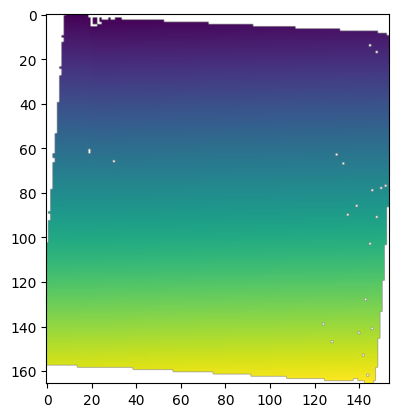

In [12]:
plt.imshow(SBFOdata[0]['ab_x'])

The raw data has now been assembled. Below is the code for making the labelling task detailed in the notebook on the 0% serenium sample

In [13]:
img_array = np.array(imgdata[0])
scaler = preprocessing.StandardScaler().fit(img_array)
scaler.mean_
scaler.scale_
X_scaled = scaler.transform(img_array)

window_size = 40
step_size = 20

# Generate a grid of coordinates based on the step size
coordinates = aoi.utils.get_coord_grid(X_scaled, step_size)

# Extract the coordinates from the first element (assuming it's the desired set)
coords = coordinates[0]

# Extract subimages, centers of mass, and frame numbers based on the generated grid
imstack_grid, com_grid, frames_grid = aoi.utils.extract_subimages(X_scaled, coords, window_size)

# Output the shape of the extracted image stack
print(imstack_grid.shape)
print(com_grid.shape)
print(frames_grid.shape)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


(40192, 40, 40, 1)
(40192, 2)
(40192,)


In [14]:
coords

array([[   0.,    0.,    0.],
       [   0.,   20.,    0.],
       [   0.,   40.,    0.],
       ...,
       [4440., 4360.,    0.],
       [4440., 4380.,    0.],
       [4440., 4400.,    0.]])

In [15]:
com_grid

array([[  80.,  380.],
       [  80.,  400.],
       [  80.,  420.],
       ...,
       [4360., 4040.],
       [4380., 4020.],
       [4380., 4040.]])

In [16]:
# Initialize a label array of zeros
label_array = np.zeros(len(com_grid), dtype=int)

In [17]:
# Define spatial regions (
substrate_region = [3000, 3150, 400, 550]  # Substrate region
domain1_region = [2000, 2150, 1000, 1150]  # Domain 1 region
domain2_region = [3000, 3150, 2000, 2150]  # Domain 2 region
domain3_region = [1000, 1150, 2000, 2150]  # Domain 3 region

In [18]:
# Ensure that com_grid and label_array are of the same size before processing
if len(label_array) != len(com_grid):
    raise ValueError("label_array and com_grid must have the same length!")

# Assign labels based on the coordinates falling within the regions
for i, (x, y) in enumerate(com_grid):
    if substrate_region[0] <= x <= substrate_region[1] and substrate_region[2] <= y <= substrate_region[3]:
        label_array[i] = 1  # Substrate
    elif domain1_region[0] <= x <= domain1_region[1] and domain1_region[2] <= y <= domain1_region[3]:
        label_array[i] = 2  # Domain 1
    elif domain2_region[0] <= x <= domain2_region[1] and domain2_region[2] <= y <= domain2_region[3]:
        label_array[i] = 3  # Domain 2
    elif domain3_region[0] <= x <= domain3_region[1] and domain3_region[2] <= y <= domain3_region[3]:
        label_array[i] = 4  # Domain 3

# Output the label array and its distribution to check the correctness
print("Label array:", label_array)
print("Distribution of labels:", np.unique(label_array, return_counts=True))

# Ensure that label_array, com_grid, and imstack_grid are aligned in size
print("Coordinates shape (com_grid):", com_grid.shape)
print("Image stack shape (imstack_grid):", imstack_grid.shape)
print("Label array shape:", label_array.shape)

Label array: [0 0 0 ... 0 0 0]
Distribution of labels: (array([0, 1, 2, 3, 4]), array([39936,    64,    64,    64,    64]))
Coordinates shape (com_grid): (40192, 2)
Image stack shape (imstack_grid): (40192, 40, 40, 1)
Label array shape: (40192,)


In [19]:
# Split the labeled and unlabeled data
labeled_indices = np.where(label_array > 0)[0]  # Indices where labels are known
unlabeled_indices = np.where(label_array == 0)[0]  # Indices where labels are unknown

# Prepare the training data (patches and labels)
X_train = imstack_grid[labeled_indices]  # Known patches (train data)
y_train = label_array[labeled_indices]  # Corresponding labels (1, 2, 3)

# Prepare the test data (patches without labels)
X_test = imstack_grid[unlabeled_indices]  # Patches for unknown labels (test data)
y_test = label_array[unlabeled_indices] #these are just all zero but its here for completeness
# Check if there are any unknown labels (0s) in the label_array
print(f"Number of unlabeled data points: {np.sum(label_array == 0)}")

# Flatten patches (if needed) for RandomForest input
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Flatten for training
X_test_flat = X_test.reshape(X_test.shape[0], -1)  # Flatten for testing

print(f"Number of domain 1 data points: {np.sum(label_array == 1)}")

Number of unlabeled data points: 39936
Number of domain 1 data points: 64


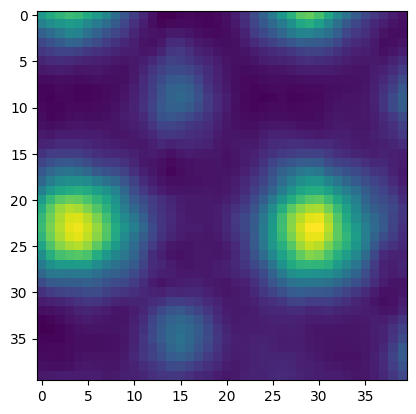

In [20]:
plt.imshow(X_train[40, :, :, 0])

In [21]:
import numpy as np

def get_patch_polarization(patch_center, window_size, ab_data):
    """
    Calculates the average polarization vector for a specific image patch.

    Args:
        patch_center (tuple): (y, x) from com_grid[i]
        window_size (int): The size of the patch (e.g., 40)
        ab_data (dict): The dictionary containing ab_x, ab_y, ab_Px, ab_Py

    Returns:
        tuple: (mean_Px, mean_Py)
    """
    # 1. Define the Pixel Boundaries of the patch
    y_center, x_center = patch_center
    half_window = window_size / 2

    x_min = x_center - half_window
    x_max = x_center + half_window
    y_min = y_center - half_window
    y_max = y_center + half_window

    # 2. Retrieve the Lattice Coordinate Maps
    # These contain the physical pixel location of every unit cell
    lattice_x_coords = ab_data['ab_x']
    lattice_y_coords = ab_data['ab_y']

    # 3. Create a Mask to find atoms inside this patch
    # We want indices where the atom's X is within [x_min, x_max]
    # AND the atom's Y is within [y_min, y_max]
    mask = (
        (lattice_x_coords >= x_min) & (lattice_x_coords < x_max) &
        (lattice_y_coords >= y_min) & (lattice_y_coords < y_max)
    )

    # 4. Extract the Polarization values for those atoms
    # We apply the mask to the Px and Py grids
    px_values = ab_data['ab_Px'][mask]
    py_values = ab_data['ab_Py'][mask]

    # Handle empty patches (e.g., if the patch is in a black border region)
    if len(px_values) == 0:
        return 0.0, 0.0

    # 5. Compute the Average Vector
    avg_Px = np.nanmean(px_values)
    avg_Py = np.nanmean(py_values)

    return avg_Px, avg_Py

for i in range(len(imstack_grid)):
  patch_center = com_grid[i]
  window_size = 40
  avg_Px, avg_Py = get_patch_polarization(patch_center, window_size, SBFOdata[0])
  print(avg_Px)







# --- Usage Example ---

# Let's say we want to check the 50th patch in your stack
index = 10001
patch_center = com_grid[index] # e.g., [1200, 500]
window_size = 40 # From your notebook

# Pass the whole SBFOdata dictionary for the current image
current_image_data = SBFOdata[0]

avg_Px, avg_Py = get_patch_polarization(patch_center, window_size, current_image_data)

print(f"Patch {index} at {patch_center}:")
print(f"  Average Polarization: Px={avg_Px:.4f}, Py={avg_Py:.4f}")

Streaming output truncated to the last 5000 lines.
0.35775525991437007
1.2733294950103868
1.0156787754021934
-0.4761542913715857
-0.7947624034411547
-0.08871814459723737
-1.4246800535368038
-1.0399715205170992
0.6806989214421719
2.945843160154027
0.8088574754206093
-0.10342675647672195
1.1212746963593645
-3.3531368810574804
-1.2737447582067603
-1.1242476236223524
-3.0541426118886648
-3.082683889530472
-1.3047885937828596
2.577846662744264
4.682586623523775
-2.4524473034639414
-0.7337883856856328
0.6248776565093976
-1.1575794004117295
-6.095809365521063
-4.162478144657598
-2.987478451039351
-2.6074987410212316
-2.2485317718619626
0.6870606085444706
1.6658054958302273
1.7962407139109473
0.9479310447059106
-3.0672628249872105
-2.8215366641084074
-0.27759564714381213
2.02061920894198
-0.6772186439743564
1.107166196248727
1.1917054681988475
1.7544336003015815
-0.6080473040749439
-2.7437907964822443
0.45873102008272326
0.8129697078693425
0.8725781297289359
-0.864099180171479
-0.5053561341342

In [22]:
#assemble

data_dict = {
    'X_train': X_train,
    'y_train': y_train,
    'X_test': X_test,
    'y_test': y_test,
    'com_grid': com_grid, #this states the pixel indices where each subimage is located in the full STEM image
    'full_image': imgdata[0][()], #this is the full STEM image

}

In [23]:
import joblib
joblib.dump(data_dict, 'data.joblib')

['data.joblib']

Looping

In [24]:
#windows = [80, 40, 20, 10]
windows=[5]
sm_concs = [0, 7, 10, 13, 20]

for window in windows:
  for sm_conc_ind in range(len(sm_concs)):
    print(f"Window: {window}, Sm Concentration: {sm_concs[sm_conc_ind]}")

    img_array = np.array(imgdata[sm_conc_ind])
    scaler = preprocessing.StandardScaler().fit(img_array)
    scaler.mean_
    scaler.scale_
    X_scaled = scaler.transform(img_array)

    window_size = window
    step_size = int(window_size / 2)

    # Generate a grid of coordinates based on the step size
    coordinates = aoi.utils.get_coord_grid(X_scaled, step_size)

    # Extract the coordinates from the first element (assuming it's the desired set)
    coords = coordinates[0]

    # Extract subimages, centers of mass, and frame numbers based on the generated grid
    imstack_grid, com_grid, frames_grid = aoi.utils.extract_subimages(X_scaled, coords, window_size)

    # Initialize a label array of zeros
    label_array = np.zeros(len(com_grid), dtype=int)

    if sm_conc_ind == 0: #domain labels are provided for sm_conc of zero
      # Define spatial regions (
      substrate_region = [3000, 3150, 400, 550]  # Substrate region
      domain1_region = [2000, 2150, 1000, 1150]  # Domain 1 region
      domain2_region = [3000, 3150, 2000, 2150]  # Domain 2 region
      domain3_region = [1000, 1150, 2000, 2150]  # Domain 3 region


      # Ensure that com_grid and label_array are of the same size before processing
      if len(label_array) != len(com_grid):
          raise ValueError("label_array and com_grid must have the same length!")

      # Assign labels based on the coordinates falling within the regions
      for i, (x, y) in enumerate(com_grid):
          if substrate_region[0] <= x <= substrate_region[1] and substrate_region[2] <= y <= substrate_region[3]:
              label_array[i] = 1  # Substrate
          elif domain1_region[0] <= x <= domain1_region[1] and domain1_region[2] <= y <= domain1_region[3]:
              label_array[i] = 2  # Domain 1
          elif domain2_region[0] <= x <= domain2_region[1] and domain2_region[2] <= y <= domain2_region[3]:
              label_array[i] = 3  # Domain 2
          elif domain3_region[0] <= x <= domain3_region[1] and domain3_region[2] <= y <= domain3_region[3]:
              label_array[i] = 4  # Domain 3


    X = imstack_grid
    y = label_array

    Px_list = []
    Py_list = []
    for i in range(len(X)):
      patch_center = com_grid[i]
      window_size = window
      current_image_data = SBFOdata[sm_conc_ind]
      avg_Px, avg_Py = get_patch_polarization(patch_center, window_size, current_image_data)
      Px_list.append(avg_Px)
      Py_list.append(avg_Py)

    data_dict = {
        'X': X,
        'y': y,
        'Px_list': np.array(Px_list),
        'Py_list': np.array(Py_list),
        'com_grid': com_grid,
        'full_image': imgdata[sm_conc_ind][()],
        'Px_full': SBFOdata[sm_conc_ind]['ab_Px'],
        'Py_full': SBFOdata[sm_conc_ind]['ab_Py'],
        'ab_x_full': SBFOdata[sm_conc_ind]['ab_x'],
        'ab_y_full': SBFOdata[sm_conc_ind]['ab_y'],

    }
    joblib.dump(data_dict, f'./drive/MyDrive/2025_Hackathon/Data/Serenium_{sm_concs[sm_conc_ind]}/Window_{window}/data.joblib')



Window: 5, Sm Concentration: 0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Window: 5, Sm Concentration: 7
Window: 5, Sm Concentration: 10


/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Window: 5, Sm Concentration: 13


/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Window: 5, Sm Concentration: 20
